# SciPy

A biblioteca SciPy disponibiliza muitas funcionalidades de computação científica implementadas de forma eficiente, incluindo integração numérica, interpolação, otimização, álgebra linear e Estatística. A documentação completa pode ser encontrada em [docs.scipy.org/doc](https://docs.scipy.org/doc/). Os módulos disponíveis no SciPy incluem:

 1. *cluster*: Algoritmos de agrupamento hierárquicos e por quantização vetorial
 2. *constants*: Constantes físicas e matemáticas
 3. *fftpack*: Funções relacionadas à transformada rápida de Fourier
 4. *integrate*: Funções para calcular integrais e equações diferenciais ordinárias
 5. *interpolate*: Interpolação e *splines* de suavização
 6. *linalg*: Álgebra linear
 7. *optimize*: Otimização e funções para encontrar raízes
 8. *signal*: Processamento de sinais
 9. *spatial*: Algoritmos, estruturas de dados espaciais e distâncias
 10. *stats*: Funções e distribuições estatísticas


## Funções para integração

O módulo *integrate* oferece diversas funções para calcular integrais. A primeira delas é a função *quad*, que permite computar uma integral definida de uma variável:

In [1]:
from scipy.integrate import quad

x2 = lambda x: x**2
integral = quad(x2, 0, 2)
print('resultado: {}, erro: {}'.format(integral[0], integral[1]))

resultado: 2.666666666666667, erro: 2.960594732333751e-14


In [2]:
import numpy as np

def normal_fdp(x, mu, sigma_2):
    return np.exp(-(x - mu) ** 2 / (2 * sigma_2)) / np.sqrt(2 * np.pi * sigma_2)

standard_fdp = lambda x: normal_fdp(x, 0, 1)
integral = quad(standard_fdp, -3, 3)
print('P(-3 < X < 3): {}, erro: {}'.format(integral[0], integral[1]))

P(-3 < X < 3): 0.9973002039367399, erro: 1.1072256503105314e-14


Para computar integrais duplas, triplas e sobre múltiplas variáveis, o módulo oferece respectivamente as funções *dblquad*, *tplquad* e *nquad*.

## Funções para interpolação

Para interpolar funções 1D, o ódulo *interpolate* possui a função *interp1d*. Essa função é chamada com dois vetores *x* e *y* e retorna uma função que pode ser chamda para usar interpolação e encontrar novos valores de *y* para novos valores de *x*. 

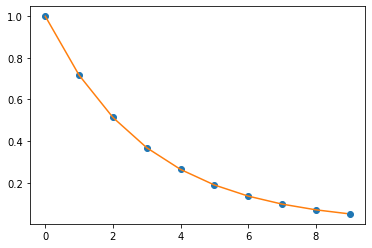

In [3]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.arange(0, 10)
y = np.exp(-x / 3.0)
f = interp1d(x, y)

x_new = np.arange(0, 9, 0.1)
y_new = f(x_new)
plt.plot(x, y, 'o', x_new, y_new, '-')
plt.show()

## Funções espaciais

O módulo *spatial* contém diversas funções para calcular distâncias, realizar transformações espaciais, encontrar envólucros convexos, etc. As masis de 20 funções de distâncias são encontradas no submódulo *spatial.distance* e incluem distâncias entre vetores e entre linhas de matrizes. A função *pdist* permite calcular as distâncias par-a-par entre as linhas de uma matriz *X*:

In [4]:
from scipy.spatial.distance import pdist

X = np.arange(12).reshape(4, 3)
print(pdist(X))

[ 5.19615242 10.39230485 15.58845727  5.19615242 10.39230485  5.19615242]


O retorno da função *pdist* é uma matriz condensada na forma de um vetor, para economizar espaço. A ideia é que a matriz de distâncias original tem diagonal *0* e valores espelhados. Para recuperar a matriz quadrada original, pode-se usar a função *squareform*:

In [5]:
from scipy.spatial.distance import squareform

print(squareform(pdist(X)))

[[ 0.          5.19615242 10.39230485 15.58845727]
 [ 5.19615242  0.          5.19615242 10.39230485]
 [10.39230485  5.19615242  0.          5.19615242]
 [15.58845727 10.39230485  5.19615242  0.        ]]


A função *pdist* permite escolher a métrica de distância utilizada, tendo a distância Euclidiana como padrão. Por exemplo, para se calcular a distância Euclidiana quadrática, pode-se fazer:

In [6]:
print(squareform(pdist(X, metric='sqeuclidean')))

[[  0.  27. 108. 243.]
 [ 27.   0.  27. 108.]
 [108.  27.   0.  27.]
 [243. 108.  27.   0.]]


Para calcular as distâncias entre as linhas de uma matriz $A$ e as de uma matriz $B$, usa-se a função *cdist*, que, assim como a função *pdist*, permite escolher a métrica.

In [7]:
from scipy.spatial.distance import cdist

A = np.arange(30).reshape(10, 3)
B = np.random.random((4, 3))

print(cdist(A, B, metric='cityblock'))

[[ 1.9404205   2.31192602  1.91593257  2.95758485]
 [10.92084664  9.77998367  9.51659719 10.04698058]
 [19.92084664 18.77998367 18.51659719 19.04698058]
 [28.92084664 27.77998367 27.51659719 28.04698058]
 [37.92084664 36.77998367 36.51659719 37.04698058]
 [46.92084664 45.77998367 45.51659719 46.04698058]
 [55.92084664 54.77998367 54.51659719 55.04698058]
 [64.92084664 63.77998367 63.51659719 64.04698058]
 [73.92084664 72.77998367 72.51659719 73.04698058]
 [82.92084664 81.77998367 81.51659719 82.04698058]]


## Funções de otimização

O módulo *optimize* oferece funções para minimização ou maximização de funções objetivo, com a possibilidade de forçar restrições. A principal função desse módulo é a *minimize*, que precisa receber como parâmetros uma função que será minimizada e uma solução inicial. Outros parâmetros incluem argumentos extras para a função minimizada, o método de minimização escolhido (padrão *BFGS*), possíveis restrições, uma função para calcular a Hessiana, um parâmetro e tolerância para critério de parada, entre outros.

In [8]:
from scipy.optimize import minimize

f = lambda x: x ** 2
x0 = 10

res = minimize(f, x0)
print(res.x)

[-4.14270251e-08]


In [9]:
x0 = 1
res = minimize(f, x0)
print(res.x)

[-7.45036449e-09]


In [10]:
x0 = 10
bounds = [(0, None)]

res = minimize(f, x0, bounds=bounds)
print(res.x)

[2.88291837e-15]


In [11]:
x0 = 1
bounds = [(0, None)]

res = minimize(f, x0, bounds=bounds)
print(res.x)

[0.]


A função *minimize* pode ser usada para estimar modelos. Por exemplo, vamos usá-la para estimar um modelo de regressão linear:

In [12]:
np.random.seed(42)
X = np.random.random(1000)
y = 3 * X + 2 + np.random.normal(size=1000)

betas = np.random.normal(size=2)

sq_err = lambda b, x, y: np.mean(((x*b[1] + b[0]) - y) ** 2)

res = minimize(sq_err, betas, args=(X, y))
print(res.x)

[2.17478032 2.84521493]


## Funções estatísticas

O módulo *stats* contém uma grande quantidade de distribuições de probabilidade (124 atualmente), e uma biblioteca em constante crescimento de funções estatísticas, incluindo estatística descritiva, distribuições de frequência, correlações, testes, transformações, distâncias, estatística circular, etc. Também há duas classes que facilitam a criação de distribuições customizadas: *rv_continuous*, para distribuições contínuas, e *rv_discrete*, para discretas.

### Usando distribuições

Nesta Seção, tomaremos como exemplo a distribuição normal, representada pela classe *scipy.stats.norm*, que herda todos métodos genéricos da classe *rv_continuous*. A classe *norm* representa a forma normal padrão, i.e. sua função densidade de probabilidade (fdp) para um número real $x$ é: $$f(x) = \frac{e^{-x^{2}/2}}{\sqrt{2\pi}}.$$
Para importar a ditribuição normal, fazemos: 


In [13]:
from scipy.stats import norm

Para calcular alguns momentos:

In [14]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print('média: {}, variância: {}, assimetria: {}, curtose: {}'.format(mean, var, skew, kurt))

média: 0.0, variância: 1.0, assimetria: 0.0, curtose: 0.0


Como dito acima, essa classe implementa a distribuição normal padrão. Para deslocar ou mudar a escala da distribuição, i.e. informar média e desvio-padrão, pode-se infomar os parâmetros *loc* e *scale*, respectivamente. Exemplo:

In [15]:
mean, var = norm.stats(loc=2, scale=0.5, moments='mv')
print('média: {}, variância: {}'.format(mean, var, skew, kurt))

média: 2.0, variância: 0.25


Para calcular a fdp para um número real $x$, fazemos:

In [16]:
x = 1
print(norm.pdf(x, loc=2, scale=0.5))

0.10798193302637613


A função *pdf* também pode ser usada para calcular a fdp para cada elemento de um *array*:

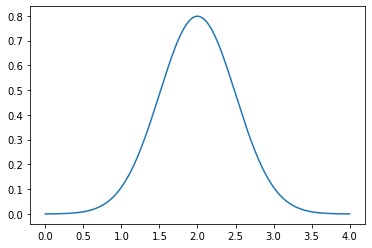

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 1000)
plt.plot(x, norm.pdf(x, loc=2, scale=0.5))
plt.show()

A função de distribuição acumulada pode ser calculada de maneira muito similar, usando a função *cdf*:

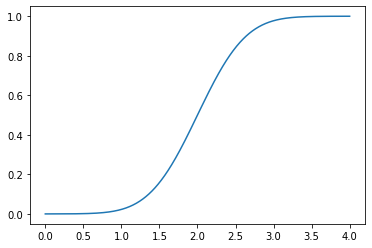

In [18]:
plt.plot(x, norm.cdf(x, loc=2, scale=0.5))
plt.show()

Para construir o intervalo que contém $95\%$ da distribuição, faz-se:

In [19]:
print(norm.interval(0.95, loc=2, scale=0.5))

(1.020018007729973, 2.979981992270027)


Para construir o intervalo de confiança de $95\%$ para a média de $100$ observações de uma normal $X \sim N(2, 0.25)$, podemos usar a função *interval* novamente:

In [20]:
print(norm.interval(0.95, loc=2, scale=0.5/100))

(1.9902001800772997, 2.0097998199227)


Para retirar amostras de uma variável $X \sim N(2, 0.25)$, usamos a função *rvs* (de *random variable sample*):

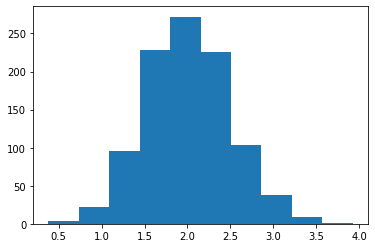

In [21]:
np.random.seed(42)

samples = norm.rvs(loc=2, scale=0.5, size=1000)
plt.hist(samples)
plt.show()

Para obter os percentis de uma variável $X \sim N(2, 0.25)$ usamos a função *ppf* (*percent point function*):

In [22]:
q1 = norm.ppf(0.25, loc=2, scale=0.5)
q3 = norm.ppf(0.75, loc=2, scale=0.5)

print('primeiro quartil: {}, terceiro quartil: {}'.format(q1, q3))

primeiro quartil: 1.6627551249019592, terceiro quartil: 2.337244875098041


Note que, ao longo desses exemplos, foi necessário informar a média (*loc*) e o desvio padrão (*scale*) repetidamente. Para evitar essa repetição de código, é possível criar um objeto *norm* que armazena a média e o desvio padrão para posterior uso nos demais métodos. Para isso, basta chamar *norm* em forma de função (construtor).

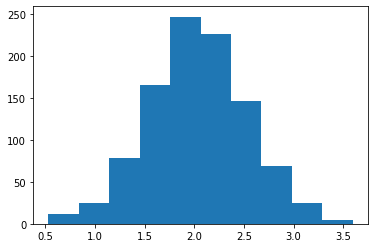

In [23]:
rv = norm(loc=2, scale=0.5)

samples = rv.rvs(size=1000)
plt.hist(samples)
plt.show()

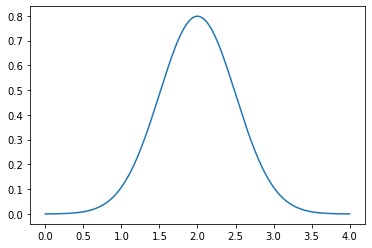

In [24]:
x = np.linspace(0, 4, 1000)
plt.plot(x, rv.pdf(x))
plt.show()

Ao fazer isso, os métodos não aceitarão mais os parâmetros *loc* e *scale*:

In [25]:
plt.plot(x, rv.pdf(x, loc=2, scale=0.5))
plt.show()

TypeError: pdf() got an unexpected keyword argument 'loc'

Outras funções úteis incluem *expect* e *fit*. A função *expect* calcula o valor esperado de uma função com respeito à distribuição. Exemplo:

In [26]:
def square(x):
    return x ** 2

expected_x_square = rv.expect(square)
square_expected_x = rv.mean() ** 2
var_calc = expected_x_square - square_expected_x

print('variância 1: {}, variância 2: {}'.format(var_calc, rv.var()))

variância 1: 0.2500000000000009, variância 2: 0.25


A função *fit* ajusta uma distribuição ao *array* de dados informado. No caso da distribuição normal, isso significa calcular a média e o desvio padrão dos dados. Exemplo:

In [27]:
np.random.seed(42)
x = norm.rvs(loc=1, scale=3, size=1000)

mean, std = norm.fit(x)
print('média: {}, desvio padrão: {}'.format(mean, std))

média: 1.0579961674669767, desvio padrão: 2.9361786232420632


Apesar de termos usado a distribuição normal como exemplo, todas as funcionalidades que apresentamos também se aplicam às outras distribuições contínuas e discretas, com uma diferença: nas distribuições discretas, a função *pdf* dá lugar à função *pmf* (função massa de probabilidade). No entando, seu uso é igual.

### Testes de hipótese

O módulo *stats* atualmente oferece 32 funções para realizar diferentes testes de hipótese, incluindo testes paramétricos e não-paraétricos para média, mediana e variância e testes de bondade de ajuste e de normalidade. Começaremos cobrindo o teste t de Student bicaudal para a média de uma coleção de observações, i.e. $H_0\text{:}~ \bar{x} = \mu_0$ e $H_1\text{:}~ \bar{x} \neq \mu_0$. Esse teste pode ser realizado pela função *ttest_1samp*, que recebe como parâmetros um *array* e uma média populacional:

In [28]:
from scipy.stats import ttest_1samp

np.random.seed(42)

x = norm.rvs(loc=5, scale=10, size=1000)
print(
    'Não rejeita a hipótese nula: {}'.format(ttest_1samp(x, 5))
)
print(
    'Rejeita a hipótese nula: {}'.format(ttest_1samp(x, 0))
)

Não rejeita a hipótese nula: Ttest_1sampResult(statistic=0.6243089585093202, pvalue=0.5325672436623019)
Rejeita a hipótese nula: Ttest_1sampResult(statistic=16.77129726247285, pvalue=8.210083235562808e-56)


Os testes t para duas amostras podem ser realizados para amostras independentes ou pareadas por meio das funções *ttest_ind* e *ttest_rel*, respectivamente. A função *ttest_ind* recebe dois *arrays* e realiza um teste bicaudal para igualdade das duas médias. Exemplo:

In [29]:
from scipy.stats import ttest_ind

np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=5, scale=10, size=30)

print(
    'Não rejeita a hipótese nula: {}'.format(ttest_ind(a, b))
)

Não rejeita a hipótese nula: Ttest_indResult(statistic=-1.2296429533938804, pvalue=0.22252704557384642)


A função *ttest_ind* assume por padrão que as duas populações têm a mesma variância. Caso deseje-se assumir variâncias diferentes, pode-se atribuir o valor **False** ao parâmetro *equal_var*:

In [30]:
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=0, scale=1, size=30)

print(
    'Rejeita a hipótese nula: {}'.format(ttest_ind(a, b, equal_var=False))
)

Rejeita a hipótese nula: Ttest_indResult(statistic=2.0257732965417956, pvalue=0.048054285617342485)


Caso apenas os valores das médias, desvios e tamanhos amostrais estejam disponíveis (ao invés das amostras em si), pode-se usar a função *ttest_ind_from_stats*:

In [31]:
from scipy.stats import ttest_ind_from_stats

mean1, std1, nobs1 = 0, 1, 50
mean2, std2, nobs2 = -1, 1, 15

print(
    'Rejeita a hipótese nula: {}'.format(
        ttest_ind_from_stats(
            mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False
        )
    )
)

Rejeita a hipótese nula: Ttest_indResult(statistic=3.396831102433787, pvalue=0.0024703403870314903)


Para realizar testes t bicaudais para a igualdade de médias com amostras pareadas, o módulo *stats* disponibiliza a função *ttest_rel*:

In [32]:
from scipy.stats import ttest_rel
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=0, scale=1, size=50)  # mesmo tamanho

print(
    'Rejeita a hipótese nula: {}'.format(ttest_rel(a, b))
)

Rejeita a hipótese nula: Ttest_relResult(statistic=2.07798026408817, pvalue=0.042971567080910246)


O teste dos postos sinalizados de Wilcoxon é comumente tratado como uma versão não-paramétrica do teste t para amostras pareadas. Ele testa se a distribuição das diferenças entre as duas amostras é simétrica e centrada em zero. No módulo *stats*, esse teste é realizado pela função *wilcoxon* e inclui um parâmetro para escolha da cauda do teste, com padrão bicaudal (*two-sided*):

In [33]:
from scipy.stats import wilcoxon
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=6, scale=1, size=50)

print(
    'Rejeita a hipótese nula: {}'.format(wilcoxon(a, b))
)

print(
    'Rejeita a hipótese nula: {}'.format(
        wilcoxon(a, b, alternative='two-sided')  # mesmo resultado
    )
)

print(
    'Não rejeita a hipótese nula: {}'.format(
        wilcoxon(a, b, alternative='greater')
    )
)

print(
    'Rejeita a hipótese nula: {}'.format(
        wilcoxon(a, b, alternative='less')
    )
)

Rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.016018532187551015)
Rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.016018532187551015)
Não rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.9919907339062245)
Rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.008009266093775507)


Para realizar o teste de Kolmogorov-Smirnov (KS) de bondade de ajuste é simples, basta informar uma amostra e o nome de uma distribuição disponível no módulo *stats* à função *kstest*:

In [34]:
from scipy.stats import kstest
np.random.seed(42)

a = norm.rvs(size=50)

print(
    'Não rejeita a hipótese nula: {}'.format(
        kstest(a, 'norm')
    )
)

a = norm.rvs(loc=5, scale=10, size=50)

print(
    'Rejeita a hipótese nula: {}'.format(
        kstest(a, 'norm')
    )
)

Não rejeita a hipótese nula: KstestResult(statistic=0.13357070563896067, pvalue=0.3074515771790649)
Rejeita a hipótese nula: KstestResult(statistic=0.6375899529148361, pvalue=2.827049477141131e-20)


Note que nos exemplos acima, a hipótese nula foi rejeitada quando os dados não foram sorteados de uma normal padrão. Isso porque, como vimos acima, no SciPy, *norm* é a distribuição padrão. No entanto, ao invés de passar o nome da distribuição como parâmetro, podemos passar a função *cdf* de uma distribuição normal qualquer. Exemplo

In [35]:
a = norm.rvs(loc=5, scale=10, size=50)

normal = norm(loc=5, scale=10)
print(
    'Não rejeita a hipótese nula: {}'.format(
        kstest(a, normal.cdf)
    )
)

Não rejeita a hipótese nula: KstestResult(statistic=0.08326080724304702, pvalue=0.878828192065557)


Para testar a hipótese de que duas amostras foram extraídas da mesma distribuição contínua, podemos usar o teste KS para duas amostras:

In [36]:
from scipy.stats import ks_2samp

a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=5, scale=10, size=50)

print(
    'Não rejeita a hipótese nula: {}'.format(
        ks_2samp(a, b)
    )
)

b = norm.rvs(size=50)

print(
    'Rejeita a hipótese nula: {}'.format(
        ks_2samp(a, b)
    )
)

Não rejeita a hipótese nula: Ks_2sampResult(statistic=0.18, pvalue=0.3959398631708505)
Rejeita a hipótese nula: Ks_2sampResult(statistic=0.68, pvalue=2.6679407140599687e-11)
